In [7]:
import pandas as pd
import pyomo.environ as pe
import preprocessing
from optimisation import *
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import model
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tqdm
import swifter
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import featuretools as ft
import preprocessing
import featuretools.variable_types as vtypes
from sklearn.metrics import mean_squared_error
from math import sqrt
from vowpalwabbit import pyvw

In [8]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [9]:
%%time
df_train, df_test, true_existence_expectancy_index = preprocessing.preprocessing_all(train, test, trend_features = False, trend_y = False, fill_value = -10, coeff = 0.2, num_k = 7)

100%|██████████| 180/180 [00:00<00:00, 451.67it/s]
0 1 Large Magellanic Cloud (LMC)
1 1 Camelopardalis B
2 1 Virgo I
3 1 UGC 8651 (DDO 181)
4 2 Tucana Dwarf
5 1 KKh 060
6 1 Grus II
7 1 UGCA 292
8 1 Aquarius II
9 1 Andromeda XI
10 1 Antlia Dwarf
11 1 IC 1613 (UGC 668)
12 2 Leo P
13 0 Cassiopeia Dwarf (Cas dSph, Andromeda VII)
14 1 Draco II
15 1 Sagittarius II
16 1 Carina III
17 1 UGCA 133 (DDO 44)
18 1 Lacerta I (Andromeda XXXI)
19 1 Boötes IV
20 1 Maffei 2
21 1 KUG 1210+301B (KK98 127)
22 2 Andromeda V
23 1 Sagittarius Dwarf Sphr SagDEG
24 1 UGCA 276 (DDO 113)
25 1 Ursa Minor Dwarf
26 1 UGC 9128 (DDO 187)
27 1 Andromeda XX
28 1 Segue 2
29 0 Fornax Dwarf (E356-G04)
30 1 Columba I
31 1 KK98 77
32 1 Holmberg II (DDO 50, UGC 4305)
33 1 ESO 540-030 (KDG 2)
34 1 NGC 404
35 1 UGC 8833
36 1 Perseus I (Andromeda XXXIII)
37 1 Horologium II
38 1 Andromeda XXVI
39 1 Grus I
40 0 Andromeda IX
41 1 Andromeda XXII[57]
42 1 ESO 274-01[70]
43 1 Leo II Dwarf (Leo B, DDO 93)
44 0 Reticulum II
45 0 Androme

In [ ]:
%%time
# df_test = df_test.drop(columns='y')
test_out, y_prob_model, y_model, rank_diviation_all = model.run_model_and_distrs(df_train, df_test, percent_val=0.01, qunity_starts=80, quantity_points_out=100, round_digits=12, percent_drop_out=0.05 )


In [ ]:
np.mean(rank_diviation_all)

In [24]:
with open('test_out.pkl', 'wb') as handle:
    pickle.dump(test_out, handle)

with open('y_prob_model.pkl', 'wb') as handle:
    pickle.dump(y_prob_model, handle)

with open('y_model.pkl', 'wb') as handle:
    pickle.dump(y_model, handle)



In [3]:
with open('test_out.pkl', 'rb') as handle:
    test_out = pickle.load(handle)

with open('y_prob_model.pkl', 'rb') as handle:
    y_prob_model = pickle.load(handle)

with open('y_model.pkl', 'rb') as handle:
    y_model = pickle.load(handle)

with open('true_existence_expectancy_index.pkl', 'rb') as handle:
    true_existence_expectancy_index = pickle.load(handle)


In [5]:
%%time
opt = galaxy_optim(test_out, y_prob_model, y_model, true_existence_expectancy_index, deviation=17)
opt.solve()
results = opt.prepare_output_file()
opt.check_optim_results()


100%|██████████| 890/890 [04:12<00:00,  3.52it/s]
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 1782
  Number of variables: 890
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.18823814392089844
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of s

In [7]:
from model import split_train_val

In [10]:
X_train, X_val, y_train, y_val = split_train_val(df_train.drop(columns= ['galaxy']), df_test, 0.2, 0.1)

In [11]:
import shap

gbm = lgb.LGBMRegressor(objective='rmse', max_depth=12, num_leaves=23, learning_rate=0.01, colsample_bytree=0.800, subsample=0.803, early_stopping_rounds=20,n_estimators=10000)

gbm.fit(X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='RMSE',
        early_stopping_rounds=10)

[1]	valid_0's rmse: 0.0744011
Training until validation scores don't improve for 20 rounds
[2]	valid_0's rmse: 0.0737139
[3]	valid_0's rmse: 0.0730367
[4]	valid_0's rmse: 0.0723832
[5]	valid_0's rmse: 0.0716669
[6]	valid_0's rmse: 0.0710031
[7]	valid_0's rmse: 0.0703021
[8]	valid_0's rmse: 0.069659
[9]	valid_0's rmse: 0.0689717
[10]	valid_0's rmse: 0.0683612
[11]	valid_0's rmse: 0.0676883
[12]	valid_0's rmse: 0.0670704
[13]	valid_0's rmse: 0.0664086
[14]	valid_0's rmse: 0.065806
[15]	valid_0's rmse: 0.0651601
[16]	valid_0's rmse: 0.0645212
[17]	valid_0's rmse: 0.0638899
[18]	valid_0's rmse: 0.0633132
[19]	valid_0's rmse: 0.0626937
[20]	valid_0's rmse: 0.0620861
[21]	valid_0's rmse: 0.0614779
[22]	valid_0's rmse: 0.0609296
[23]	valid_0's rmse: 0.0603371
[24]	valid_0's rmse: 0.0597486
[25]	valid_0's rmse: 0.0591697
[26]	valid_0's rmse: 0.0586454
[27]	valid_0's rmse: 0.0580793
[28]	valid_0's rmse: 0.0575198
[29]	valid_0's rmse: 0.0569712
[30]	valid_0's rmse: 0.0564644
[31]	valid_0's rmse:

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
              early_stopping_rounds=20, importance_type='split',
              learning_rate=0.01, max_depth=12, min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=10000,
              n_jobs=-1, num_leaves=23, objective='rmse', random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.803,
              subsample_for_bin=200000, subsample_freq=0)

In [12]:
shap_values = shap.TreeExplainer(gbm).shap_values(X_train)

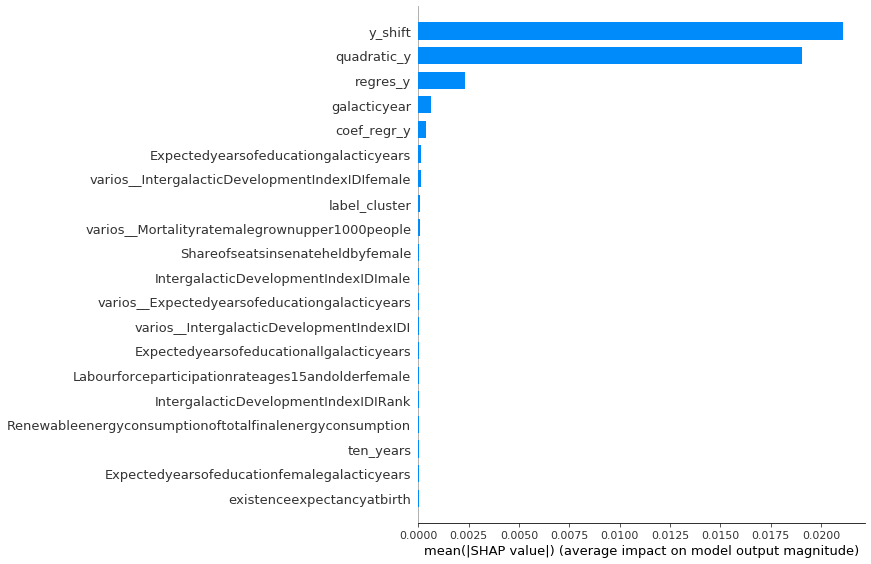

In [13]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

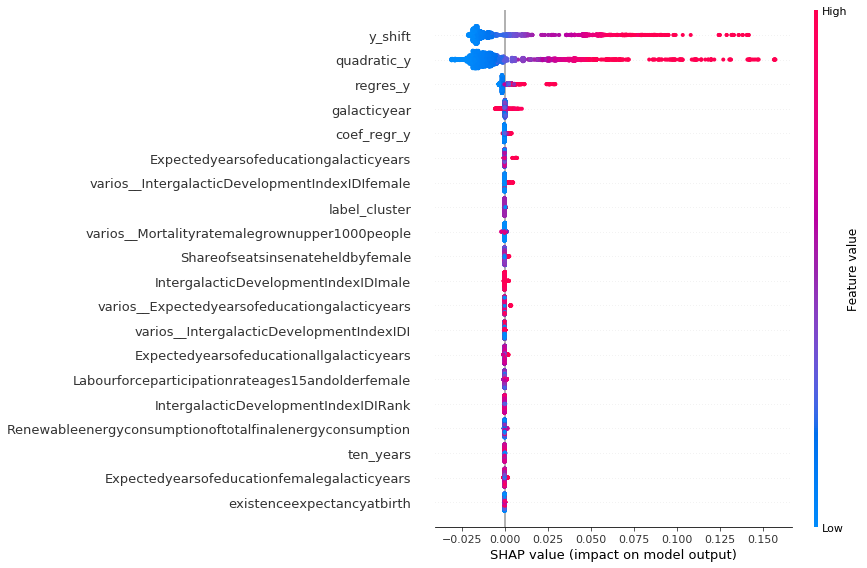

In [14]:
shap.summary_plot(shap_values, X_train)